In [383]:
print("PYBER RIDE SHARING")
print("-------------------------------------------------------------------------------------")

PYBER RIDE SHARING
-------------------------------------------------------------------------------------


In [384]:
print("Analysis")
print("")
print("The more urban is the city, the more rides and drivers there are.")
print("The progression from rural to suburbian to urban cities is remarkably continuous, with the only exception")
print("of an outlier not shown in the picture (a suburban city with 64 rides).  It may be interesting to analyze")
print("why that particular city had so many rides.")
print("About two thirds of the rides and fares and almost 90% of the drivers are to be found in urban cities, again")
print("showing that most of this business is a urban affair.")
print("Having said so, it's interesting to notice that the suburbian drivers, while being only 13% of the total,")
print("collect 31% of the fares, which means that, per capita, they have higher revenue than their urban")
print("counterparts.  Since their fares represent are 27% of the total, it means that the reason because they gather,")
print("per capita, more money, it's that they simply work much more, again per capita, of their urban counterpart")
print("and, secondarily, they charge a bit more, although this second reason is much less significant than the first")
print("one.")
print("-------------------------------------------------------------------------------------")

Analysis

The more urban is the city, the more rides and drivers there are.
The progression from rural to suburbian to urban cities is remarkably continuous, with the only exception
of an outlier not shown in the picture (a suburban city with 64 rides).  It may be interesting to analyze
why that particular city had so many rides.
About two thirds of the rides and fares and almost 90% of the drivers are to be found in urban cities, again
showing that most of this business is a urban affair.
Having said so, it's interesting to notice that the suburbian drivers, while being only 13% of the total,
collect 31% of the fares, which means that, per capita, they have higher revenue than their urban
counterparts.  Since their fares represent are 27% of the total, it means that the reason because they gather,
per capita, more money, it's that they simply work much more, again per capita, of their urban counterpart
and, secondarily, they charge a bit more, although this second reason is much less 

In [385]:
                    # MODULES
    
# 1) matplotlib and numpy are imported because we want to make charts
# 2) seaborn, built on top of matplotlib, is a library to make particularly attractive charts
# 3) pandas is imported because we want to do this exercise in Pandas

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [386]:
                    # FILES

# 1) Uploading and reading first CSV file
# Uploading first CSV file from folder "raw_data", placed in the same folder as this "Pyber_Solved_By_Me" ipynb file,
# and then reading it

kkk = "raw_data/city_data.csv"
cityDF = pd.read_csv(kkk)

# cityDF.head()

In [387]:
# Counting the number of valid rows, to check for NaNs or anyway to address dataframe size
# cityDF.count()

In [388]:
# 1) Uploading and reading second CSV file

lll = "raw_data/ride_data.csv"
rideDF = pd.read_csv(lll)

# rideDF.head()

In [389]:
# Counting the number of valid rows, to check for NaNs or anyway to address dataframe size
# rideDF.count()

In [392]:
                    # DATAFRAMES

# 1) Preparing the general dataframe for all cities
# Only the "City" column is common to the two dataframes.  We should then merge them into a new dataframe that contains
# only the rows for which an element in the column

df1 = pd.merge(cityDF, rideDF, on="city")
print("Snapshot of the data on which the analysis was based")
city_ride_data.head()

Snapshot of the data on which the analysis was based


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [393]:
# Counting the number of valid rows, to check for NaNs or anyway to address dataframe size
# df1.count()

In [394]:
# 2) Breaking down the cities in the possible types ("Rural","Suburban","Urban"), by creating three different 
# dataframes, each of them capturing different rows of the original dataframe df1

dfR=df1[df1["type"]=="Rural"]
dfS=df1[df1["type"]=="Suburban"]
dfU=df1[df1["type"]=="Urban"]

# dfR.head()

In [395]:
                    # SCATTER PLOT
    
# 1) Determining the x coordinates (total number of rides per city)

# To do so, first we need to list things by city, by creating three objects (each for each city type) that rearrange 
# the related dataframes according to their column "city"

objR=dfR.groupby("city")
objS=dfS.groupby("city")
objU=dfU.groupby("city")

# From this object, we can then create a series that determines, for each city, the total number of rides
# The object and the series are the equivalent of performing a VLOOKUP in Excel

rideR=objR["ride_id"].count()
rideS=objS["ride_id"].count()
rideU=objU["ride_id"].count()

# rideU.head()
# print (max(rideR),max(rideS),max(rideU))

In [396]:
# 2) Determining the y axis (average fare for each city)

# Similar process to what just seen above, except that we deal with the column "fare" (not "ride_id") and we 
# average (not count) the values

fareR=objR["fare"].mean()
fareS=objS["fare"].mean()
fareU=objU["fare"].mean()

# fareU.head()
# print (max(fareR),max(fareS),max(fareU))

In [397]:
# 3) Determining the bubble size (average number of drivers in each city)

# Similar process to what just seen above, except that we deal with the column "driver_count" (not "fare")

driverR=objR["driver_count"].mean()
driverS=objS["driver_count"].mean()
driverU=objU["driver_count"].mean()

# driverR.head()
# print (max(driverR),max(driverS),max(driverU))

In [398]:
# 4) Buid the scatter plots for rural, suburban, and urban cities

# We made the bubble sizes more visible by multiplying their size by 5

plt.scatter(rideR,fareR,marker="o",facecolor="gold",edgecolor="black",s=5*driverR,label="Rural")
plt.scatter(rideS,fareS,marker="o",facecolor="skyblue",edgecolor="black",s=5*driverS,label="Suburban")
plt.scatter(rideU,fareU,marker="o",facecolor="coral",edgecolor="black",s=5*driverU,label="Urban")

# plt.show()

In [399]:
# 5) Limit the x axis to 40 rides (as shown in the example), which happens to exclude one interesting outlier (a
#suburban city with 64 rides)

plt.xlim((0,40))

# 6) Add axis labels and title as shown in the example

plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# 7) Add a grid, as shown in the example

plt.grid(True)

# plt.show()

In [400]:
# 8) Add a legend

L1 = plt.legend(loc="upper right", title="City Types")
L1.legendHandles[0]._sizes = [50]
L1.legendHandles[1]._sizes = [50]
L1.legendHandles[2]._sizes = [50]

# plt.show()

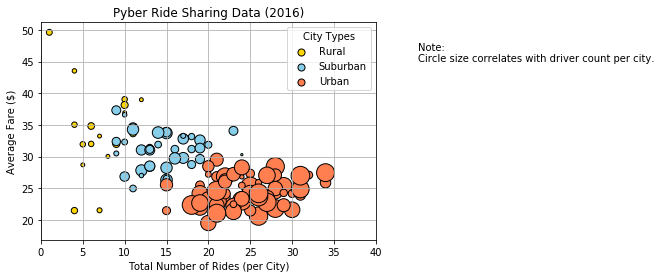

In [401]:
# 9) Add the note shown in the example
plt.text(45,45,"Note:\nCircle size correlates with driver count per city.")

# 10) Save the chart
plt.savefig("Chart1.png")

# Show plot
plt.show()

In [402]:
                    # FARE PIE CHART
    
# 1) Determining the list of fares by type

# To do so, first we need to list things by type, by creating a object that rearrange the original dataframe (df1)
# according to the column "type"

objT=df1.groupby("type")

# From this object, we can then create a series that determines, for each type, the total fares

fareT=objT["fare"].sum()

# fareT.head()

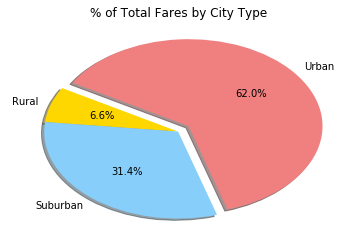

In [403]:
# 2) Build the plot for the pie chart, with "Urban" cities exploded as shown in the example

plt.pie(fareT,explode=[0,0,0.1],labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"],
        autopct="%1.1f%%",shadow=True,startangle=150)
plt.title("% of Total Fares by City Type")
plt.axis
plt.savefig("Chart2.png")
plt.show()

In [404]:
                    # RIDE PIE CHART
    
# 1) Determining the list of rides by type

# The process is similar to the one above, except that we need to count the rides ("ride_id" column), instead of
# summing the fares

rideT=objT["ride_id"].count()

# rideT.head()

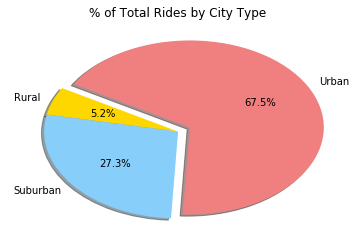

In [405]:
# 2) Build the plot for the pie chart, with "Urban" cities exploded as shown in the example

plt.pie(rideT,explode=[0,0,0.1],labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"],
        autopct="%1.1f%%",shadow=True,startangle=150)
plt.title("% of Total Rides by City Type")
plt.axis
plt.savefig("Chart3.png")
plt.show()

In [406]:
                    # DRIVER PIE CHART
    
# 1) Determining the list of drivers by type

# The process is similar to the one above, except that we need to sum the driver counts instead of the counting the
# rides

driverT=objT["driver_count"].sum()

# driverT.head()

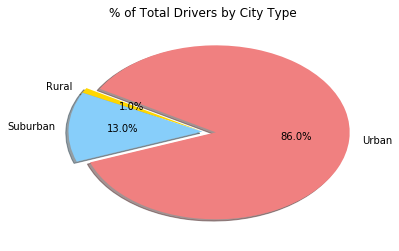

In [407]:
# 2) Build the plot for the pie chart, with "Urban" cities exploded as shown in the example

plt.pie(driverT,explode=[0,0,0.1],labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"],
        autopct="%1.1f%%",shadow=True,startangle=150)
plt.title("% of Total Drivers by City Type")
plt.axis
plt.savefig("Chart4.png")
plt.show()